# Final Mod 1 Project Office Hours

- 07/31/20
- 070620FT

<div style="font-size:1.7rem;font-weight:bold;">
    <h4>TOPICS</h4>
<ol>
    <li>Exporting final notebook -> README.md </li>
    <li>Review non-technical presentation requirements. </li>
    <li>Turning in project links.</li>
    <li>Adding references/citations for other people's code</li>
    <li>End of Module Survey</li>
    </ol>
    </div>

## Exporting Notebook

From inside your final project Jupyter Notebook:
- In the menu bar, select: `File`>`Download as` > `Markdown (md)`


> The notebook and output images will be saved into a .zip folder and downloaded via your web browser.


- **Open the .zip file using File Exporer / Finder and Extract the files** into a folder (you can keep in your Downloads folder)


- **Switch to the Jupyter Notebook startup page/file browser.**


- **Select the check box next to the README.md file** in the jupyter file browser


- **Click the `Rename` button** (above the list of files.)
    - Change the filename to ***ANYTHING other than README.md*** (e.g. README_original.md)


- After renaming the original README, **click on the `Upload` button above the file list on the right next to the `New` button.**


> Finder or windows explorer will pop up now for you to select the files that you want to upload to your repository. 

- **Navigate to the folder where you extracted the .zip file**
- Select all of the files(`Cmd`+`A` for Mac, `Cntrl`+`A` for windows) and click OK.
    
    
> The files will now appear in the File list but the haven't been saved yet.

- click the blue `Upload` button that appears next to each file.
    
- **Finally, rename your exported notebook's md file to README.md (`student.md` > `README.md`).**


- **Commit your changes and push them to GitHub.**
- **Go to your repo url and verify that you can scroll down and see your own notebook as the README.**
    

## Non-Technical Presentation Requirements

- Remember your target audience is Microsoft.
- Your presentation should be 5-8 min long. 

> - **Make sure your presentation has:**
    - Title Slide (with your name)
    - Intro or Overview slide
    - Data or Methods slide<br><br>
    - For each of your 3 questions:
        - Show your figure and bullet-pointed observations.
        - Make sure to include an **actionable recommendation** for Microsoft based on your visual/observations.<br><br>
    - A Conclusions slide (repeat answers/recommendations)
    - A Future Work slide (list what you would do next for them if they pay you to keep working on this project)
    - A Thank You slide
    
- **Save your presentation as a pdf inside your repo. (`presentation.pdf`)**

## Turning in project links.

## End of Module Survey

___

# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Introduction

- This analysis is meant to...


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import os
os.listdir('zippedData/')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
import pandas as pd

In [4]:
import glob 
file_list = glob.glob('zippedData/*gz')
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
str.replace?

In [6]:
file_list[0].split('/')[-1].strip('.csv.gz')

'imdb.title.crew'

In [7]:
'_'.join(file_list[0].split('/')[-1].split('.')[:-2])

'imdb_title_crew'

### Loading in Data

In [8]:
## Saving tables into a dicty
TABLES = {}
for file in file_list:
    
    ## Loading in file
    try:
        df = pd.read_csv(file)
        
    ## addressing tsvs,etc
    except:
        df = pd.read_csv(file,sep='\t', encoding='latin-1')
    
    ## Making filename into a dict key
    fname = file.split('/')[-1]
    table_name = '_'.join(fname.split('.')[:-2])
    
    display(df.head().style.set_caption(f"{table_name}-{len(df)}"))
    TABLES[table_name] = df
    

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,nan,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533000,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.700000,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734000,2010-03-26,How to Train Your Dragon,7.700000,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515000,2010-05-07,Iron Man 2,6.800000,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005000,1995-11-22,Toy Story,7.900000,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920000,2010-07-16,Inception,8.300000,22186


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,nan,nan,0.000000
1,tt0369610,11,Jurashikku warudo,JP,nan,imdbDisplay,nan,0.000000
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,nan,imdbDisplay,nan,0.000000
3,tt0369610,13,O Mundo dos Dinossauros,BR,nan,nan,short title,0.000000
4,tt0369610,14,Jurassic World,FR,nan,imdbDisplay,nan,0.000000


,tconst,averagerating,numvotes
0,tt10356526,8.300000,31
1,tt10384606,8.900000,559
2,tt1042974,6.400000,20
3,tt1043726,4.200000,50352
4,tt1060240,6.500000,21


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,nan,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,nan,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"Continuing along a line introduced in last year's ""A Dangerous Method"", David Cronenberg pushes his cinema towards a talky abstraction in his uncanny, perversely funny and frighteningly insular adaptation of Don DeLillo, ""Cosmopolis"".",nan,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,nan,fresh,nan,0,Cinema Scope,"October 12, 2017"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,nan,104 minutes,nan
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. Teamed with Howar

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.000000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000000,664300000,2010
3,Inception,WB,292600000.000000,535700000,2010
4,Shrek Forever After,P/DW,238700000.000000,513900000,2010


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,nan,"[""The Man""]"
1,tt0111414,2,nm0398271,director,nan,nan
2,tt0111414,3,nm3739909,producer,producer,nan
3,tt0323808,10,nm0059247,editor,nan,nan
4,tt0323808,1,nm3579312,actress,nan,"[""Beth Boothby""]"


In [9]:
keys = list(TABLES.keys())
keys

['imdb_title_crew',
 'tmdb_movies',
 'imdb_title_akas',
 'imdb_title_ratings',
 'imdb_name_basics',
 'rt_reviews',
 'imdb_title_basics',
 'rt_movie_info',
 'tn_movie_budgets',
 'bom_movie_gross',
 'imdb_title_principals']

# pandasql

In [10]:
# !pip install -U pandasql

In [11]:
tconst_tables = [col for col,frame in TABLES.items() if 'tconst' in frame.columns]
tconst_tables

['imdb_title_crew',
 'imdb_title_ratings',
 'imdb_title_basics',
 'imdb_title_principals']

In [12]:
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')##TABLES['imdb_title_crew'].copy()
imdb_title_ratings = TABLES[ 'imdb_title_ratings'].copy()
imdb_title_basics = TABLES[ 'imdb_title_basics'].copy()
imdb_title_principals = TABLES[ 'imdb_title_principals'].copy()

tmdb_movies = TABLES['tmdb_movies'].copy()
imdb_title_akas = TABLES['imdb_title_akas'].copy()
rt_reviews = TABLES['rt_reviews'].copy()
rt_movie_info = TABLES['rt_movie_info'].copy()
tn_movie_budgets = TABLES['tn_movie_budgets'].copy()
bom_movie_gross = TABLES['bom_movie_gross'].copy()

In [13]:
# bom_movie_gross

In [16]:
!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

     |████████████████████████████████| 1.2MB 1.9MB/s eta 0:00:01


In [17]:
pysqldf("SELECT * from imdb_title_basics")
# df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
pysqldf("SELECT * from tn_movie_budgets")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


###  join tn_movie_dudgets and imdb_basics

In [19]:
pysqldf("SELECT * from bom_movie_gross")

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,None,2018
3383,Edward II (2018 re-release),FM,4800.0,None,2018
3384,El Pacto,Sony,2500.0,None,2018
3385,The Swan,Synergetic,2400.0,None,2018


In [20]:
pysqldf("""SELECT * 
        FROM tn_movie_budgets AS tn
        JOIN imdb_title_basics imdb 
        ON tn.movie = imdb.original_title""")

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,None
3533,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,None
3534,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [21]:
df = pysqldf("""SELECT * 
        FROM (SELECT * FROM tn_movie_budgets AS tn
        JOIN imdb_title_basics imdb 
        ON tn.movie = imdb.original_title) as T
        JOIN bom_movie_gross AS bom
        ON T.original_title = bom.title""")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",Spectre,Sony,200100000.0,680600000,2015


In [22]:
# pysqldf("""SELECT * 
#         FROM (SELECT * FROM tn_movie_budgets AS tn
#         JOIN imdb_title_basics imdb 
#         ON tn.movie = imdb.original_title) as T
#         LEFT JOIN bom_movie_gross AS bom
#         ON T.original_title = bom.title""")

# Using small 1500 movies

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1531 non-null   int64  
 1   release_date       1531 non-null   object 
 2   movie              1531 non-null   object 
 3   production_budget  1531 non-null   object 
 4   domestic_gross     1531 non-null   object 
 5   worldwide_gross    1531 non-null   object 
 6   tconst             1531 non-null   object 
 7   primary_title      1531 non-null   object 
 8   original_title     1531 non-null   object 
 9   start_year         1531 non-null   int64  
 10  runtime_minutes    1431 non-null   float64
 11  genres             1508 non-null   object 
 12  title              1531 non-null   object 
 13  studio             1531 non-null   object 
 14  domestic_gross     1530 non-null   float64
 15  foreign_gross      1315 non-null   object 
 16  year               1531 

  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      100
genres                23
title                  0
studio                 0
domestic_gross         0
foreign_gross          0
year                   0
dtype: int64


<AxesSubplot:>

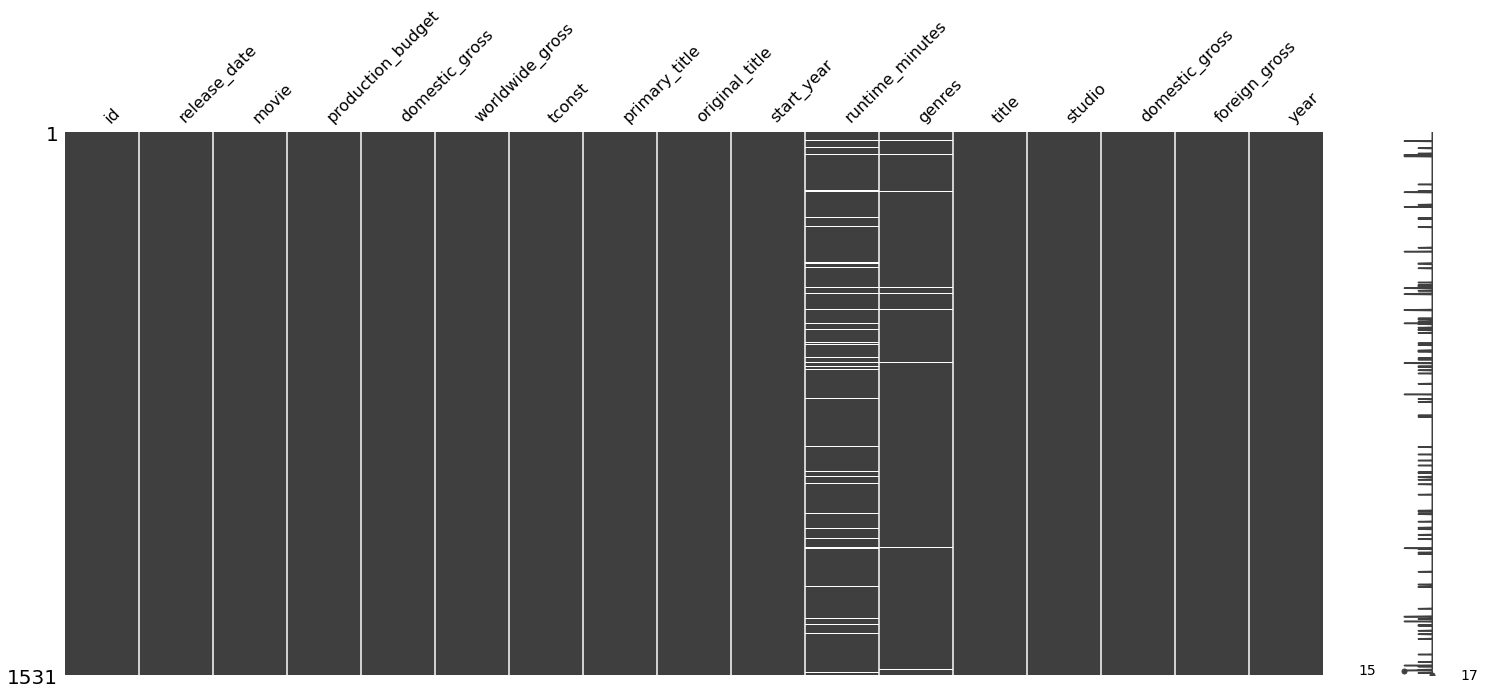

In [26]:
!pip install missingno
import missingno as ms
print(df.isna().sum())
ms.matrix(df)

In [27]:
df['foreign_gross'] = df['foreign_gross'].fillna(0)
df['domestic_gross'] = df['domestic_gross'].fillna(0)#,inplace=True)#,inplace=True)
df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      100
genres                23
title                  0
studio                 0
domestic_gross         0
foreign_gross          0
year                   0
dtype: int64

In [28]:
df.select_dtypes('object')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,genres,title,studio,domestic_gross,foreign_gross
0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Pirates of the Caribbean: On Stranger Tides,BV,2.411e+08,804600000
1,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,4.59e+08,946400000
2,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,6.788e+08,"1,369.5"
3,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,"Action,Adventure,Fantasy",Justice League,WB,2.29e+08,428900000
4,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",tt2379713,Spectre,Spectre,"Action,Adventure,Thriller",Spectre,Sony,2.001e+08,680600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,"Apr 27, 2012",Sound of My Voice,"$135,000","$408,015","$429,448",tt1748207,Sound of My Voice,Sound of My Voice,"Drama,Mystery,Sci-Fi",Sound of My Voice,FoxS,408000,0
1527,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",tt1742336,Your Sister's Sister,Your Sister's Sister,"Comedy,Drama",Your Sister's Sister,IFC,1.6e+06,0
1528,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",tt2309260,The Gallows,The Gallows,"Horror,Mystery,Thriller",The Gallows,WB (NL),2.28e+07,20200000
1529,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",tt6265828,A Ghost Story,A Ghost Story,"Drama,Fantasy,Romance",A Ghost Story,A24,1.6e+06,0


In [29]:
x = df['production_budget'].iloc[0]
x

'$410,600,000'

In [30]:
x.replace('$','').replace(',','')

'410600000'

In [31]:
def fix_money(x):
    if isinstance(x,str)==False:
        x = str(x)
    return x.replace('$','').replace(',','')

In [32]:
fix_money(x)

'410600000'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531 entries, 0 to 1530
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1531 non-null   int64  
 1   release_date       1531 non-null   object 
 2   movie              1531 non-null   object 
 3   production_budget  1531 non-null   object 
 4   domestic_gross     1531 non-null   object 
 5   worldwide_gross    1531 non-null   object 
 6   tconst             1531 non-null   object 
 7   primary_title      1531 non-null   object 
 8   original_title     1531 non-null   object 
 9   start_year         1531 non-null   int64  
 10  runtime_minutes    1431 non-null   float64
 11  genres             1508 non-null   object 
 12  title              1531 non-null   object 
 13  studio             1531 non-null   object 
 14  domestic_gross     1531 non-null   object 
 15  foreign_gross      1531 non-null   object 
 16  year               1531 

In [34]:
# df.set_index('tconst',inplace=True)
df[df.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year


In [35]:
# money_cols = ['production_budget','domestic_gross','worldwide_gross']#[c for c in df.select_dtypes('O').columns if 'gross' in c]

# for col in money_cols:
#     df[col] =  df[col].apply(fix_money)

# API

- 

In [36]:
import os
os.listdir('/Users/jamesirving/.secret/')

['fsds_notifications_gmail.json',
 'pt_cohort_data.csv',
 'cohort_output.csv',
 'learn_login.json',
 'google_query.txt',
 'genius_example.json',
 'amber_chat_redshift.txt',
 'cohort_links.json',
 'gmail.json',
 'mysql_login.json',
 'output.csv',
 'yelp_api.json',
 'tmdb_api.json',
 'ft_cohort_data.csv',
 'docker_commands.txt',
 'yelp_api_flatiron.json',
 'zoom_login.json',
 'john_ofrecio.txt',
 'dark_sky.json',
 'genius_api.json',
 'spotify_api.json',
 'csv_table.csv']

In [37]:
import json
with open("/Users/jamesirving/.secret/tmdb_api.json") as file:
    api_info = json.load(file)
api_key = api_info['api-key']

In [38]:
import requests

In [39]:
# TABLES['imdb_title_basics'].loc['original_title']

In [40]:
## Example ext id
external_id = 'tt1298650'

## Query for imdb_id results
q_imdb = f"https://api.themoviedb.org/3/find/{external_id}?api_key={api_key}&language=en-US&external_source=imdb_id"
resp = requests.get(q_imdb).json()

movie_results = pd.DataFrame(resp['movie_results'])
movie_results

,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path,popularity
0,1865,False,10107,6.5,Pirates of the Caribbean: On Stranger Tides,2011-05-14,en,Pirates of the Caribbean: On Stranger Tides,"[28, 12, 14]",/bfTKq6mGHt2CzZlBU31JHF9bMog.jpg,False,Captain Jack Sparrow crosses paths with a woma...,/keGfSvCmYj7CvdRx36OdVrAEibE.jpg,28.526


In [41]:
movie_id = movie_results['id'].iloc[0]
q_release = f"https://api.themoviedb.org/3/movie/{movie_id}/release_dates?api_key={api_key}"
resp = requests.get(q_release).json()
resp['results']

[{'iso_3166_1': 'KZ',
  'release_dates': [{'certification': 'Б14',
    'iso_639_1': '',
    'note': '',
    'release_date': '2011-05-14T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'IT',
  'release_dates': [{'certification': 'T',
    'iso_639_1': '',
    'note': '',
    'release_date': '2011-05-18T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'US',
  'release_dates': [{'certification': 'PG-13',
    'iso_639_1': '',
    'note': 'Anaheim, California',
    'release_date': '2011-05-07T00:00:00.000Z',
    'type': 1},
   {'certification': 'PG-13',
    'iso_639_1': '',
    'release_date': '2011-05-20T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'CA',
  'release_dates': [{'certification': 'PG',
    'iso_639_1': '',
    'release_date': '2011-05-20T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'NZ',
  'release_dates': [{'certification': 'M',
    'iso_639_1': '',
    'note': '',
    'release_date': '2011-05-19T00:00:00.000Z',
    'type': 3}]},
 {'iso_3166_1': 'AU',
  'release_da

In [76]:
q=f"https://api.themoviedb.org/3/discover/movie?api_key={api_info['api-key']}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page=1&year=2019"
resp = requests.get(q)
resp.status_code

200

In [77]:
resp.json()

{'page': 1,
 'total_results': 10000,
 'total_pages': 500,
 'results': [{'popularity': 130.157,
   'vote_count': 122,
   'video': False,
   'poster_path': '/1hVEsBS4vnozB1yAsMiqW0IMxyp.jpg',
   'id': 430155,
   'adult': False,
   'backdrop_path': '/6kJKTKnnPbpyeqCgodqgjkI9aMk.jpg',
   'original_language': 'ru',
   'original_title': 'Koma',
   'genre_ids': [28, 14, 878],
   'title': 'Coma',
   'vote_average': 6.1,
   'overview': 'A young and talented architect comes to his senses after a horrific accident only to find himself in the odd dystopian world. A world that is filled with the memories of all current coma patients. Just like a human memory this world is fragmental, chaotic and unstable. This is COMA: icecaps, rivers and cities can all exist in a space of a single room and laws of physics are no longer laws as they can be bent.',
   'release_date': '2019-11-19'},
  {'popularity': 103.04,
   'vote_count': 13993,
   'video': False,
   'poster_path': '/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg